In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline

In [3]:
%autoreload

%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
import numpy as np

import darkhistory.physics as phys
from darkhistory.history.tla import get_history

import main
import config
from tqdm import tqdm_notebook as tqdm

In [27]:
fz_elec_decay = np.loadtxt('/Users/hongwan/Dropbox (MIT)/DM_IGM_Scattering/TLA_code/fz_electron_decay.dat', delimiter=',')

log10rs  = fz_elec_decay[0:70, 1]
log10eng = fz_elec_decay[0:2800:70, 0] 

log10f_elec_decay = {
    'H_ion':   np.transpose(np.reshape(fz_elec_decay[0:2800,2], (40,70))),
    'He_ion':  np.transpose(np.reshape(fz_elec_decay[2800:5600,2], (40,70))),
    'H_exc':   np.transpose(np.reshape(fz_elec_decay[5600:8400,2], (40,70))),
    'heating': np.transpose(np.reshape(fz_elec_decay[8400:11200,2], (40,70))),
    'cont':    np.transpose(np.reshape(fz_elec_decay[11200:14000,2], (40,70))) 
}

fz_phot_decay = np.loadtxt('/Users/hongwan/Dropbox (MIT)/DM_IGM_Scattering/TLA_code/fz_photon_decay.dat', delimiter=',')

log10rs  = fz_phot_decay[0:70, 1]
log10eng = fz_phot_decay[0:2800:70, 0] 

log10f_phot_decay = {
    'H_ion':   np.transpose(np.reshape(fz_phot_decay[0:2800,2], (40,70))),
    'He_ion':  np.transpose(np.reshape(fz_phot_decay[2800:5600,2], (40,70))),
    'H_exc':   np.transpose(np.reshape(fz_phot_decay[5600:8400,2], (40,70))),
    'heating': np.transpose(np.reshape(fz_phot_decay[8400:11200,2], (40,70))),
    'cont':    np.transpose(np.reshape(fz_phot_decay[11200:14000,2], (40,70)))
}

fz_elec_swave = np.loadtxt('/Users/hongwan/Dropbox (MIT)/21cm_DM/code/TLA_code/fz_electron_swave_NFW_no_subs.dat', delimiter=',')

log10rs  = fz_elec_swave[0:70, 1]
log10eng = fz_elec_swave[0:2800:70, 0] 

log10f_elec_swave = {
    'H_ion':   np.transpose(np.reshape(fz_elec_swave[0:2800,2], (40,70))),
    'He_ion':  np.transpose(np.reshape(fz_elec_swave[2800:5600,2], (40,70))),
    'H_exc':   np.transpose(np.reshape(fz_elec_swave[5600:8400,2], (40,70))),
    'heating': np.transpose(np.reshape(fz_elec_swave[8400:11200,2], (40,70))),
    'cont':    np.transpose(np.reshape(fz_elec_swave[11200:14000,2], (40,70))) 
}

fz_phot_swave = np.loadtxt('/Users/hongwan/Dropbox (MIT)/21cm_DM/code/TLA_code/fz_photon_swave_NFW_no_subs.dat', delimiter=',')

log10rs  = fz_phot_swave[0:70, 1]
log10eng = fz_phot_swave[0:2800:70, 0] 

log10f_phot_swave = {
    'H_ion':   np.transpose(np.reshape(fz_phot_swave[0:2800,2], (40,70))),
    'He_ion':  np.transpose(np.reshape(fz_phot_swave[2800:5600,2], (40,70))),
    'H_exc':   np.transpose(np.reshape(fz_phot_swave[5600:8400,2], (40,70))),
    'heating': np.transpose(np.reshape(fz_phot_swave[8400:11200,2], (40,70))),
    'cont':    np.transpose(np.reshape(fz_phot_swave[11200:14000,2], (40,70)))
}

In [71]:
particle_type = 'phot'
inj_type = 'decay'

if particle_type == 'elec':
    def f_H_ion(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_decay['H_ion'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_swave['H_ion'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))
    
    def f_He_ion(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_decay['He_ion'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_swave['He_ion'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))
    
    def f_H_exc(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_decay['H_exc'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_swave['H_exc'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))

    def f_heating(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_decay['heating'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_swave['heating'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))
    
    def f_cont(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_decay['cont'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_elec_swave['cont'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))

else:
    
    def f_H_ion(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_decay['H_ion'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_swave['H_ion'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))
    
    def f_He_ion(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_decay['He_ion'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_swave['He_ion'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))
    
    def f_H_exc(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_decay['H_exc'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_swave['H_exc'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))

    def f_heating(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_decay['heating'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_swave['heating'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))
    
    def f_cont(eng, rs):
        if inj_type == 'decay':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_decay['cont'])
            fac = 2
        elif inj_type == 'swave':
            interp_func = interp2d(log10eng, log10rs, log10f_phot_swave['cont'])
            fac = 1
        return 10**interp_func(np.log10(eng), np.log10(rs))

In [63]:
%autoreload
f_phot_decay = {
    chan:[
        [
            phys.f_std(eng*2, rs, inj_particle='phot', inj_type='decay', channel=chan, struct=False)
            for rs in rs_vec
        ]
        for eng in tqdm(eng_arr)
    ] for chan in ['H ion', 'He ion', 'exc', 'heat', 'cont']
}

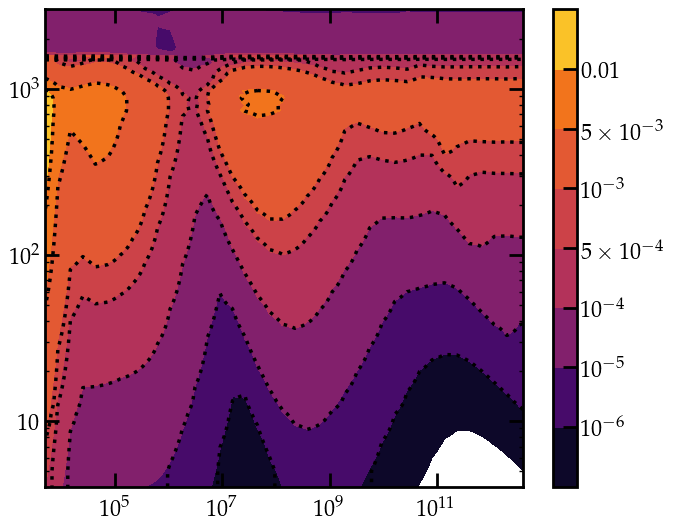

In [74]:
rs_vec = 3000*np.exp(-.001*np.arange(6620))
eng_arr = 5e3*10**(np.arange(40)*0.23252559)
eng_arr[-1]=10**12.60150599

chan = 'He ion'

plt.figure(figsize=(7.7, 6.2))

plt.loglog()

if particle_type == 'phot':
    if inj_type == 'decay':
        if chan == 'H ion': 
            levels_f = np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1]))
            levels_f_labels = [
                r'$10^{-4}$', r'$10^{-3}$', r'$5 \times 10^{-3}$', r'$0.01$', 
                r'$0.05$', r'$0.1$', r'$0.3$'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1, 1]))
        elif chan == 'He ion':
            levels_f = np.log10(np.array([1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2]))
            levels_f_labels = [
                r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$5 \times 10^{-4}$', 
                r'$10^{-3}$', r'$5 \times 10^{-3}$', r'$0.01$'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 1]))
        elif chan == 'heat':
            levels_f = np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1]))
            levels_f_labels = [
                r'$10^{-4}$', r'$10^{-3}$', r'$5 \times 10^{-3}$', r'$0.01$', 
                r'$0.05$', r'$0.1$', r'$0.3$'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1, 1]))



ax = plt.gca()

cntr1 = ax.contourf(
    eng_arr, 
    rs_vec, 
    np.transpose(np.log10(f_phot_decay[chan])), 
    levels=levels_f_c,
#     norm=matplotlib.colors.LogNorm(),
    cmap=matplotlib.cm.inferno
)

cbar = plt.colorbar(cntr1, ax=ax, ticks=levels_f)
cbar.set_ticklabels(levels_f_labels)

if chan == 'H ion':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_H_ion(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted'
    )
elif chan == 'He ion':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_He_ion(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted'
    )
elif chan == 'heat':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_heating(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted'
    )

In [26]:
rs_vec

array([3000.        , 2997.0014995 , 2994.005996  , ...,    4.01231173,
          4.00830143,    4.00429513])